In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
print(f"Using CAMB {camb.__version__} installed at {camb.__file__}")

Using CAMB 1.5.4 installed at /home/joao/.local/lib/python3.10/site-packages/camb/__init__.py


In [2]:
h = 0.6756
omegam = 0.27
omegabh2 = 0.02238280
omegab = omegabh2/h**2
omegac = omegam - omegab
omegach2 = omegac*h**2

cases = [
	{'A': 0, 'nu': 10},
    {'A': 0.5, 'nu': 20},
    {'A': 0.3, 'nu': 50},
]
results = []

for case in cases:
	cosmo = camb.set_params(# Background
		H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
		# Dark Energy
		dark_energy_model = 'MonodromicKEssence', alpha=0.2, A=case['A'], nu=case['nu'],
		# Neutrinos
		omnuh2=0, num_nu_massless=3.044, num_nu_massive = 0,
		nu_mass_degeneracies=[0], nu_mass_numbers = [0],
		# Initial Power Spectrum
		As = 2.100549e-09, ns = 0.9660499, 
		YHe = 0.246, WantTransfer=True
	)
	results.append(camb.get_results(cosmo))

 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =    9.6707473520113316E-002
 C =    1.4456755077028907E-007 => omega_de =   0.25347119219886238     
 C =    4.1494940321373860E-007 => omega_de =   0.74095593520244685      (error =    1.5135558775992024E-002 )
 C =    4.0878733038063988E-007 => omega_de =   0.72969781299134384      (error =   -2.8846259771343334E-004 )
 C =    4.0890257448551164E-007 => omega_de =   0.72990830899649572      (error =   -7.5704973869519525E-008 )
 Finished shooting successfully after            3 iterations
 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =   0.10032897831760171     
 C =    1.4456755077028907E-007 => omega_de =   0.24908848693566465     
 C =    4.3211871892536077E-007 => omega_

4.0890257448551164e-07 0.7299029635479041
3.9838785554460127e-07 0.7288242820505603
4.052961966818426e-07 0.72822029967318


Text(0.5, 0, '$a$')

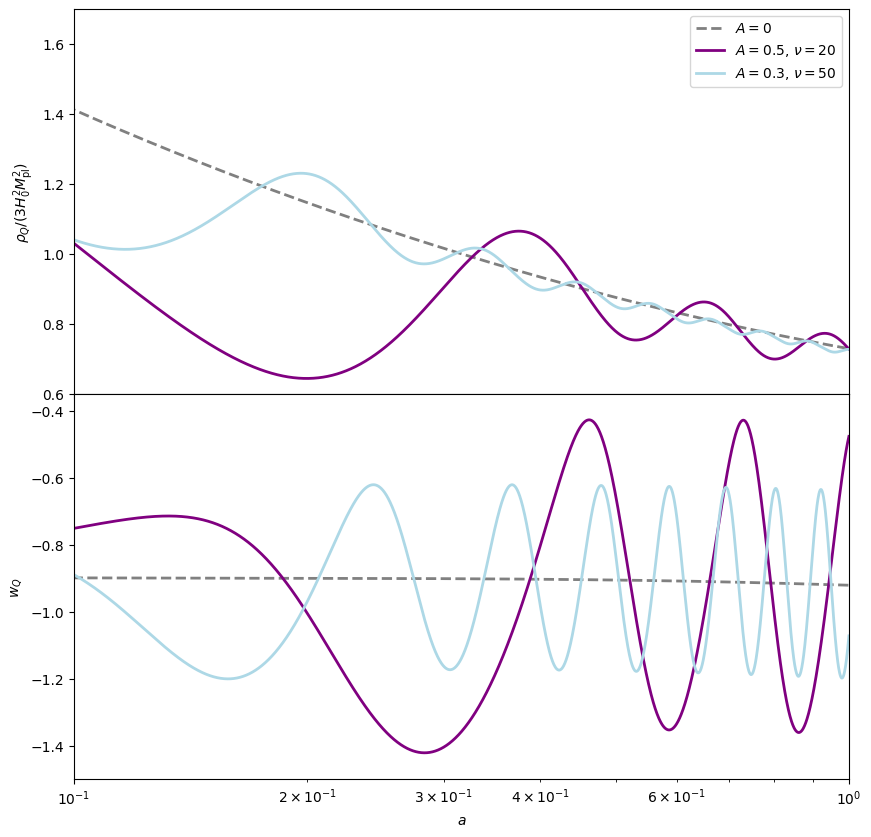

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,10), gridspec_kw={'hspace': 0})
scale_factor = np.logspace(-4, 0, 10000)
redshift = 1/scale_factor - 1
lws = [2, 2, 2]
lss = ['--', '-', '-']
colors = ['gray', 'purple', 'lightblue']
legend_labels = [fr"$A = {case['A']}$, $\nu = {case['nu']}$" if case['A'] != 0 else fr"$A = {case['A']}$" for case in cases]
for case, result, ls, lw, color, label in zip(cases, results, lss, lws, colors, legend_labels):
    rho_de, w_de = result.get_dark_energy_rho_w(scale_factor)
    print(result.Params.DarkEnergy.C, rho_de[-1]/result.grhocrit)
    hubble = result.hubble_parameter(redshift)
    cls = result.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
    ks = result.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
    pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]
    axs[0].semilogx(scale_factor, rho_de/result.grhocrit, ls=ls, lw=lw, label=label, color=color)
    axs[1].semilogx(scale_factor, w_de, ls=ls, lw=lw, label=label, color=color)
    #axs[2].semilogx(cls, ls=ls, lw=lw, label=label, color=color)
    #axs[3].semilogx(ks, pk[0], lw=lw, label=label, color=color)
    
plt.xlim([0.1, 1])
axs[0].set_ylim([0.6, 1.7])
axs[1].set_ylim([-1.5, -0.35])
axs[0].legend(loc='upper right')
axs[0].set_ylabel(r"$\rho_Q/(3H_0^2M_\mathrm{pl}^2)$")
axs[1].set_ylabel(r"$w_Q$")
axs[1].set_xlabel(r"$a$")

In [4]:
c_ells = results[0].get_unlensed_scalar_cls()

In [5]:
c_ells[:, 0]

array([ 0.,  0., nan, ..., nan, nan, nan])

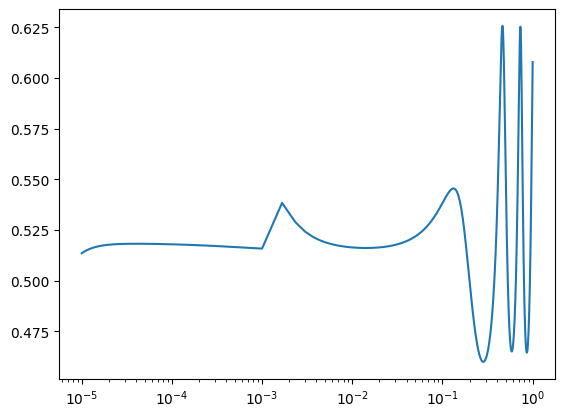

In [6]:
case = results[1].Params.DarkEnergy
plt.semilogx(case.sampled_a, case.X_a)

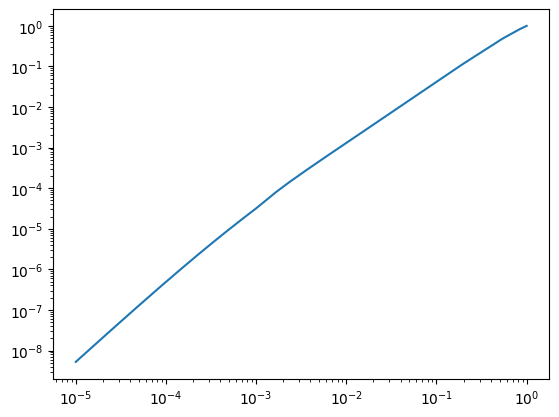

In [7]:
case = results[1].Params.DarkEnergy
plt.loglog(case.sampled_a, case.phi_a)

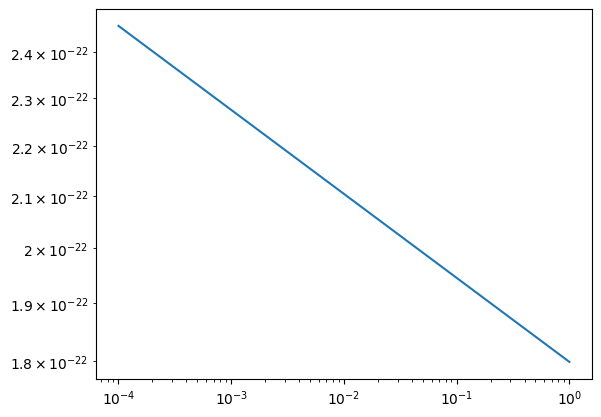

In [10]:
plt.loglog(ks, pk[0])